In [ ]:
# Define simplest lstm model
class lstm(nn.Module):
    def __init__(self, input_size, hidden_size, out_size):
        super(lstm, self).__init__()
        torch.manual_seed(180200742)    # Set seed for same initialization of weigths each time
        # shape of input (batch_size, n_sequence, input_size)
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=1, batch_first=True, bidirectional=False)
        self.fc = nn.Linear(hidden_size, out_size)
        self.relu = nn.ReLU()    # Interestingly, using Sigmoid prevents learning 
        
    def forward(self, x):
        x, _ = self.lstm(x) 
        x = x[:, -1, :]    # Choose only output of last lstm cell for classification
        x = self.fc(x)
        x = self.relu(x)  # x.shape = (batch_size, n_classes)
        return x 

In [1]:
# A notebook for simple lstm exploration
# Case of single lstm cell
import torch.nn as nn
from torch.autograd import Variable 
import torch
from core_functions import Data, Trainer, plot_train, test_accuracy

dataPath = "./second_collection_triggs_rels_32.npz"
D = Data(dataPath, triggers=True, releases=False)
D.split()
D.normalize()
D.tensors_to_device()
D.print_shapes()

Train, test and validation data normalized to:
[1.]
[1.0011533]
[1.00011294]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (7497, 1, 32) 
Labels shape:  (7497,) 
Unique labels:  [0 1 2] 
Shape of test set: (1125, 1, 32) 
Shape of train set: (5416, 1, 32) 
Shape of validation set: (956, 1, 32) 
Fraction of single class in test set:  0.31377777777777777 
dtype of inputs:  torch.float32


End of epoch 1:loss_tr=1.478, loss_val=1.468, train=33.8%, val=36.7%
End of epoch 2:loss_tr=1.464, loss_val=1.454, train=33.8%, val=36.7%
End of epoch 3:loss_tr=1.380, loss_val=1.372, train=42.6%, val=45.0%
End of epoch 4:loss_tr=1.219, loss_val=1.217, train=45.7%, val=44.6%
End of epoch 5:loss_tr=1.125, loss_val=1.123, train=53.6%, val=54.9%
End of epoch 6:loss_tr=1.072, loss_val=1.070, train=53.5%, val=54.3%
End of epoch 7:loss_tr=1.035, loss_val=1.036, train=48.3%, val=49.0%
End of epoch 8:loss_tr=1.003, loss_val=1.002, train=52.0%, val=52.2%
End of epoch 9:loss_tr=0.974, loss_val=0.975, train=53.3%, val=54.4%
End of epoch 10:loss_tr=0.949, loss_val=0.949, train=53.4%, val=54.8%
End of epoch 11:loss_tr=0.927, loss_val=0.928, train=54.9%, val=56.4%
End of epoch 12:loss_tr=0.909, loss_val=0.909, train=54.0%, val=55.1%
End of epoch 13:loss_tr=0.900, loss_val=0.901, train=54.5%, val=55.9%
End of epoch 14:loss_tr=0.882, loss_val=0.884, train=62.3%, val=63.4%
End of epoch 15:loss_tr=0.871

End of epoch 118:loss_tr=0.595, loss_val=0.570, train=74.8%, val=75.8%
End of epoch 119:loss_tr=0.599, loss_val=0.579, train=74.5%, val=75.2%
End of epoch 120:loss_tr=0.601, loss_val=0.580, train=74.9%, val=76.6%
End of epoch 121:loss_tr=0.616, loss_val=0.586, train=71.5%, val=74.7%
End of epoch 122:loss_tr=0.635, loss_val=0.615, train=72.7%, val=72.7%
End of epoch 123:loss_tr=0.611, loss_val=0.586, train=73.3%, val=75.0%
End of epoch 124:loss_tr=0.590, loss_val=0.564, train=75.6%, val=76.4%
End of epoch 125:loss_tr=0.590, loss_val=0.568, train=75.7%, val=76.2%
End of epoch 126:loss_tr=0.589, loss_val=0.565, train=75.0%, val=76.4%
End of epoch 127:loss_tr=0.584, loss_val=0.561, train=75.9%, val=76.0%
End of epoch 128:loss_tr=0.594, loss_val=0.574, train=74.5%, val=75.6%
End of epoch 129:loss_tr=0.584, loss_val=0.559, train=75.8%, val=76.8%
End of epoch 130:loss_tr=0.586, loss_val=0.557, train=74.3%, val=76.3%
End of epoch 131:loss_tr=0.581, loss_val=0.556, train=75.3%, val=76.2%
End of

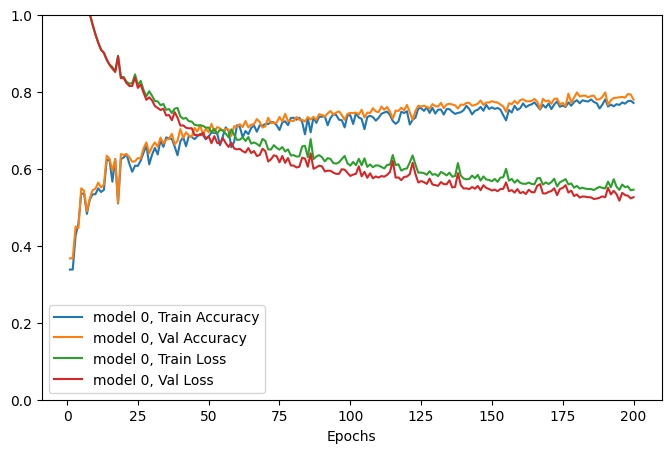

In [10]:
model = lstm(input_size=32, hidden_size=8, out_size=3) 
T = Trainer(D)
T.setup(model, learning_rate=1e-2, weight_decay=1e-3, batch_size=2*256, max_epochs=200)
T.train_model(model)
plot_train([T])
test_accuracy(D, [model])

In [42]:
# Split input into several windows
import torch.nn as nn
from torch.autograd import Variable 
import torch
from core_functions import Data, Trainer, plot_train, test_accuracy
import numpy as np

dataPath = "./second_collection_triggs_rels_32.npz"
D = Data(dataPath, triggers=True, releases=False)
D.split()
D.normalize()

def reshape_seq(x, input_size):
    if x.shape[-1] % input_size: raise ValueError("Splitting size not matching!")
    x = x.reshape((x.shape[0], int(x.shape[-1]/input_size), input_size))
    return x

input_size = 8 

D.Xtrain = reshape_seq(D.Xtrain, input_size) 
D.Xtest = reshape_seq(D.Xtest, input_size) 
D.Xval = reshape_seq(D.Xval, input_size) 

D.tensors_to_device()
D.print_shapes()

Train, test and validation data normalized to:
[1.]
[1.0011533]
[1.00011294]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (7497, 1, 32) 
Labels shape:  (7497,) 
Unique labels:  [0 1 2] 
Shape of test set: (1125, 4, 8) 
Shape of train set: (5416, 4, 8) 
Shape of validation set: (956, 4, 8) 
Fraction of single class in test set:  0.31377777777777777 
dtype of inputs:  torch.float32


In [45]:
# Try out a simple CNN + LSTM model
class cnn_lstm(nn.Module):
    def __init__(self, input_size, hidden_conv, hidden_lstm, out_size):
        super(cnn_lstm, self).__init__()
        torch.manual_seed(180200742)    # Set seed for same initialization of weigths each time
        # shape of input (batch_size, n_sequence, input_size)
        ks = 3   # kernel_size
        s = 2    # stride
        n_features = 8 

        self.conv = nn.Sequential(
                nn.Conv1d(1, out_channels=hidden_conv, kernel_size=ks, stride=s),
                nn.ReLU(),
                nn.Flatten(),
                nn.Linear(hidden_conv*int((input_size-ks)/2 + 1), n_features)
                )

        self.lstm = nn.LSTM(input_size=n_features, hidden_size=hidden_lstm, num_layers=1, batch_first=True, bidirectional=False)
        self.fc = nn.Linear(hidden_lstm, out_size)
        self.relu = nn.ReLU()    # Interestingly, using Sigmoid prevents learning 
        
    def forward(self, x):
        bs, n_seq, input_size = x.shape
        x = x.view(bs*n_seq, 1, input_size)
        x = self.conv(x)
        x = x.view(bs, n_seq, -1)

        x, _ = self.lstm(x) 
        x = x[:, -1, :]    # Choose only output of last lstm cell for classification
        x = self.fc(x)
        x = self.relu(x)  # x.shape = (batch_size, n_classes)
        return x 

End of epoch 1:loss_tr=1.079, loss_val=1.080, train=36.0%, val=35.1%
End of epoch 2:loss_tr=1.004, loss_val=1.010, train=55.1%, val=54.7%
End of epoch 3:loss_tr=0.982, loss_val=0.987, train=51.8%, val=51.3%
End of epoch 4:loss_tr=0.961, loss_val=0.968, train=54.7%, val=54.4%
End of epoch 5:loss_tr=0.961, loss_val=0.971, train=54.5%, val=53.8%
End of epoch 6:loss_tr=0.951, loss_val=0.960, train=55.6%, val=54.5%
End of epoch 7:loss_tr=0.945, loss_val=0.955, train=56.1%, val=55.2%
End of epoch 8:loss_tr=0.951, loss_val=0.959, train=55.2%, val=54.7%
End of epoch 9:loss_tr=0.944, loss_val=0.956, train=55.9%, val=54.9%
End of epoch 10:loss_tr=0.965, loss_val=0.982, train=53.0%, val=51.0%
End of epoch 11:loss_tr=1.011, loss_val=1.025, train=48.3%, val=48.0%
End of epoch 12:loss_tr=0.987, loss_val=0.994, train=51.0%, val=49.0%
End of epoch 13:loss_tr=0.951, loss_val=0.964, train=55.1%, val=54.2%
End of epoch 14:loss_tr=0.954, loss_val=0.971, train=55.1%, val=53.9%
End of epoch 15:loss_tr=0.941

End of epoch 119:loss_tr=0.515, loss_val=0.485, train=78.4%, val=79.8%
End of epoch 120:loss_tr=0.506, loss_val=0.481, train=78.6%, val=79.9%
End of epoch 121:loss_tr=0.508, loss_val=0.479, train=78.5%, val=79.7%
End of epoch 122:loss_tr=0.513, loss_val=0.494, train=78.0%, val=78.5%
End of epoch 123:loss_tr=0.542, loss_val=0.537, train=76.1%, val=76.0%
End of epoch 124:loss_tr=0.502, loss_val=0.486, train=78.6%, val=79.4%
End of epoch 125:loss_tr=0.493, loss_val=0.465, train=79.7%, val=80.6%
End of epoch 126:loss_tr=0.510, loss_val=0.497, train=78.1%, val=77.9%
End of epoch 127:loss_tr=0.491, loss_val=0.475, train=78.7%, val=79.4%
End of epoch 128:loss_tr=0.488, loss_val=0.466, train=79.6%, val=81.6%
End of epoch 129:loss_tr=0.469, loss_val=0.449, train=80.0%, val=80.8%
End of epoch 130:loss_tr=0.476, loss_val=0.455, train=79.7%, val=81.6%
End of epoch 131:loss_tr=0.491, loss_val=0.474, train=79.0%, val=80.0%
End of epoch 132:loss_tr=0.523, loss_val=0.487, train=77.4%, val=79.0%
End of

End of epoch 235:loss_tr=0.379, loss_val=0.353, train=84.3%, val=86.2%
End of epoch 236:loss_tr=0.380, loss_val=0.356, train=84.8%, val=87.1%
End of epoch 237:loss_tr=0.393, loss_val=0.376, train=83.4%, val=83.7%
End of epoch 238:loss_tr=0.416, loss_val=0.377, train=82.5%, val=85.4%
End of epoch 239:loss_tr=0.380, loss_val=0.352, train=84.7%, val=86.5%
End of epoch 240:loss_tr=0.383, loss_val=0.353, train=84.4%, val=86.8%
End of epoch 241:loss_tr=0.387, loss_val=0.359, train=84.4%, val=86.4%
End of epoch 242:loss_tr=0.382, loss_val=0.354, train=84.3%, val=86.0%
End of epoch 243:loss_tr=0.374, loss_val=0.349, train=84.6%, val=85.8%
End of epoch 244:loss_tr=0.390, loss_val=0.357, train=84.0%, val=87.1%
End of epoch 245:loss_tr=0.373, loss_val=0.354, train=84.6%, val=86.2%
End of epoch 246:loss_tr=0.378, loss_val=0.359, train=84.1%, val=85.3%
End of epoch 247:loss_tr=0.366, loss_val=0.344, train=85.4%, val=86.8%
End of epoch 248:loss_tr=0.365, loss_val=0.339, train=85.6%, val=87.1%
End of

End of epoch 352:loss_tr=0.383, loss_val=0.347, train=84.6%, val=87.0%
End of epoch 353:loss_tr=0.353, loss_val=0.337, train=85.5%, val=86.6%
End of epoch 354:loss_tr=0.359, loss_val=0.333, train=85.6%, val=87.3%
End of epoch 355:loss_tr=0.355, loss_val=0.336, train=85.5%, val=87.1%
End of epoch 356:loss_tr=0.353, loss_val=0.324, train=85.8%, val=87.6%
End of epoch 357:loss_tr=0.345, loss_val=0.321, train=86.5%, val=87.9%
End of epoch 358:loss_tr=0.351, loss_val=0.337, train=85.8%, val=87.1%
End of epoch 359:loss_tr=0.341, loss_val=0.324, train=86.1%, val=87.6%
End of epoch 360:loss_tr=0.353, loss_val=0.328, train=85.7%, val=88.2%
End of epoch 361:loss_tr=0.347, loss_val=0.321, train=86.4%, val=87.9%
End of epoch 362:loss_tr=0.348, loss_val=0.325, train=86.4%, val=88.8%
End of epoch 363:loss_tr=0.347, loss_val=0.328, train=86.1%, val=88.2%
End of epoch 364:loss_tr=0.352, loss_val=0.332, train=86.5%, val=88.8%
End of epoch 365:loss_tr=0.352, loss_val=0.334, train=86.1%, val=87.7%
End of

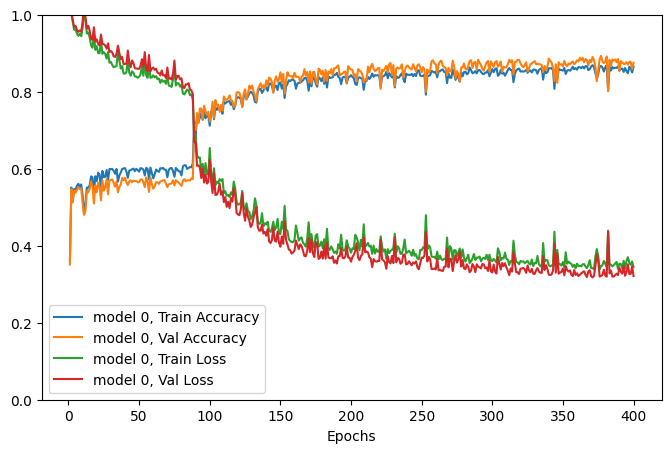

In [47]:
model = cnn_lstm(input_size, hidden_conv=8, hidden_lstm=8, out_size=3) 
T = Trainer(D)
T.setup(model, learning_rate=1e-2, weight_decay=1e-3, batch_size=2*256, max_epochs=200)
T.train_model(model)
plot_train([T])
test_accuracy(D, [model])

In [ ]:

# This function can be used to look at a sliding window 
# Not better performing than just using a split (i.e. no stride==input_size)
def change_input(x, I, S):
    """I is window size, S is stride"""

    # Make a mask used to transform inputs 
    bs = x.shape[0]
    W = x.shape[-1] 
    L = int((W - I) / S + 1)

    mask = np.full((L, W), False)
    mask[0, :I] = True 
    for i in range(1, L):
        mask[i] = np.roll(mask[i-1], shift=S)

    result = np.zeros((bs, L, I))
    x = x * np.ones((1, L, 1))  # multiply by ones to extend shape
    for i in range(bs):
        result[i] = x[i][mask].reshape((L, I))
    return result